1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


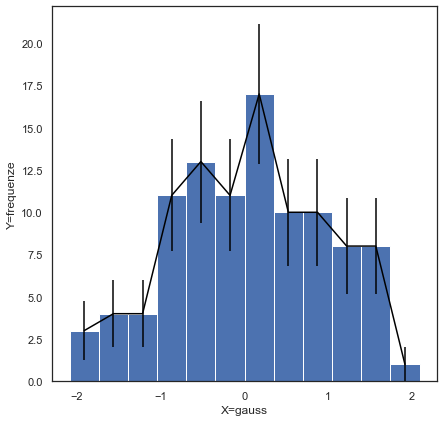

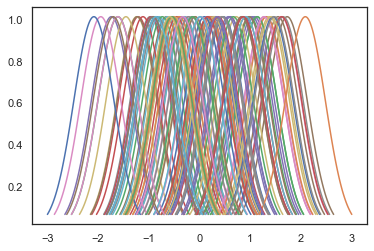

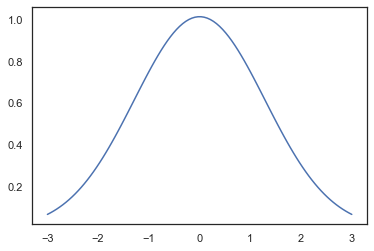

Il valore dell'integrale vale : 3.2099727015572235
Il valore dell'area sotto l'istogramma vale : 2.837560691205649


In [5]:
from scipy.integrate import trapz
from scipy.stats import norm
import math as m
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
aux=[]
for i in range(0,100):
    bo=np.random.normal(0,1)
    aux.append(bo)

x=np.array(aux)

N=12                 #è il numero di intervalli che meglio raccoglie i dati e fa "matchare" con il valore dell'integrale

x_min=np.amin(x)
x_max=np.amax(x)
dx=(x_max-x_min)/N
istogramma=[]
errori=[]
x_iniziale=x_min+dx/2
assex=[x_iniziale]

for h in range(N):
    contatore=0
    for j in range(len(x)):
        if x_min+N*dx==x_max:
            if x_min+h*dx<=x[j]<=x_min+(h+1)*dx:
                contatore+=1
        if x_min+N*dx!=x_max and h!=N-1:
             if x_min+h*dx<=x[j]<=x_min+(h+1)*dx:
                contatore+=1
        if x_min+N*dx!=x_max and h==N-1: 
            if x_min+h*dx<=x[j]<=x_max:
                contatore+=1
    istogramma.append(contatore)
    errori.append(m.sqrt(contatore))
    g=h+1
    if g<N:
        assex.append(x_iniziale+(g)*dx)

#print(assex)

#plt.scatter(assex,istogramma)
#plt.errorbar(assex,istogramma,errori )
#plt.show()


gridsize = (5, 5)
fig = plt.figure(figsize=(40,40))

ax= plt.subplot2grid(gridsize, (2, 0))
ax.hist(x, bins=N)
ax.errorbar(assex,istogramma,errori,color="black")#,fmt='none')

ax.set_xlabel("X=gauss")
ax.set_ylabel("Y=frequenze")
plt.show()

gaussiane=[]


for k in range(len(x)):
    grafici= np.linspace(norm.ppf(0.01,x[k],1.06*x.std()*m.pow(x.size,-1/5) ),norm.ppf(0.99, loc=x[k], scale=1.06*x.std()*m.pow(x.size,-1/5)), 100)
    plt.plot(grafici, norm.pdf(grafici,loc = x[k] ,scale = 1.06*x.std()*m.pow(x.size,-1/5)  ) ) 
    gaussiane.append( norm.pdf(grafici,loc = x[k] ,scale = 1.06*x.std()*m.pow(x.size,-1/5)  ) )

plt.show()

gauss_somma=0
for l in range(len(x)):
    gauss_somma=gauss_somma+gaussiane[l]






asse_somma=np.linspace(norm.ppf(0.01,x_min,1.06*x.std()*m.pow(x.size,-1/5) ),norm.ppf(0.99, loc=x_max, scale=1.06*x.std()*m.pow(x.size,-1/5)), 100)
plt.plot(asse_somma,gauss_somma/100)

plt.show()

da_gauss=np.trapz(gauss_somma, x=asse_somma)
print("Il valore dell'integrale vale :",da_gauss/100)


da_isto=np.trapz(istogramma, x=assex)
print("Il valore dell'area sotto l'istogramma vale :",da_isto/(N) )     



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

"wget" non è riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


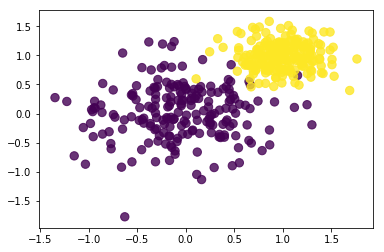

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


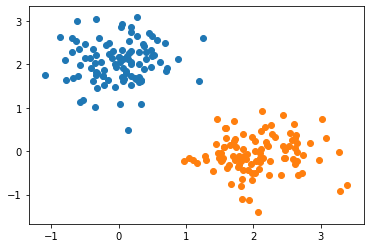

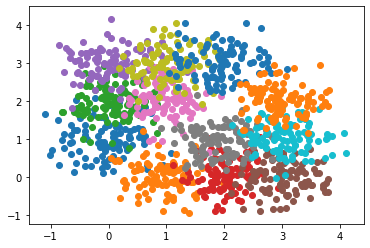

In [3]:
from scipy.stats import norm
import math as m
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

def data ():
    

    dataset1=[]
    dataset2=[]
    
    for x in range(100):
        aux1=np.random.normal(0,0.5)
    
        aux2=np.random.normal(2,0.5)
    
        dataset1.append(aux1)
        dataset2.append(aux2)
    
    DATA=np.array([dataset1,dataset2])
    
    return(DATA)

plt.scatter(data()[0],data()[1])
plt.scatter(data()[1],data()[0])
plt.show()

#more general

N=4

def data (N):
    
    Dataset=np.zeros(100*N).reshape(100,N)
    for i in range(N):
        for x in range(100):
            Aux1=np.random.normal(i,0.4)
            Dataset[x,i]=Aux1
    
    
    DATA=np.array([Dataset]).reshape(100,N)
    
    return(DATA)

for h in range(N-1):
    k=h+1
    for k in range(k,N):
        plt.scatter(data(N)[:,h],data(N)[:,k])
        plt.scatter(data(N)[:,k],data(N)[:,h])
    
plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

slope: 0.577913    intercept: 10.025258


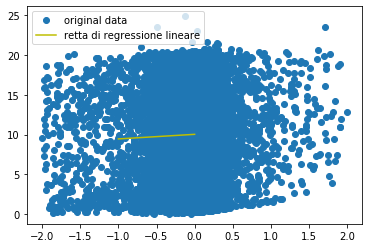

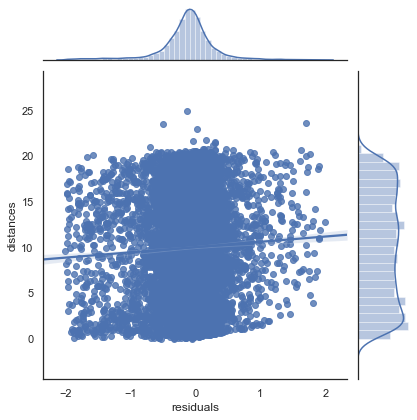

C:\Users\edoardo antonaci\ANACONDA\lib\site-packages\ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


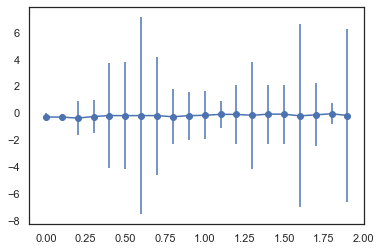

In [4]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns 
import math as m
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt

file_name=dict(np.load("residuals_261.npy",allow_pickle=True).item())
row1=file_name['residuals']
row2=file_name['distances']
dataset=np.array([ [row1[i],row2[i]] for i in range(row1.shape[0]) ]).reshape(row1.shape[0],2)
df=pd.DataFrame(dataset,columns=['residuals','distances'])
df

dataset2=[]

for i in range(row1.shape[0]):
    if abs(row1[i])<2:
        dataset2.append([row1[i],row2[i]])

dataset2=np.array(dataset2)
df2=pd.DataFrame(dataset2,columns=['residuals','distances'])


slope, intercept, r_value, p_value, std_err = stats.linregress(dataset2[:,0],dataset2[:,1])
print("slope: %f    intercept: %f" % (slope, intercept))

x=range(int(dataset2[:,0].min()),int(dataset2[:,0].max()) )
plt.plot(dataset2[:,0],dataset2[:,1], 'o', label='original data')
plt.plot(x,intercept + slope*x,"y",label="retta di regressione lineare" )
plt.legend()
plt.show()

#plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot


 
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="residuals", y="distances", data=df2,kind="reg")
plt.show()




dist=np.array( [ x*0.1 for x in range(0,20) ] )
y=[]
erry=[]
for j in range(len(dist)):
    aux=[]
    contatore=0
    residuo=0
    media_residuo=0
    for h in range(dataset2.shape[0]):
        if dist[j]<=dataset2[h,1]<=dist[j]+0.1:
            
            residuo=residuo+dataset2[h,0]
            contatore=contatore+1
            aux.append(dataset[h,0])
            
    aux=np.array(aux)        
    erry.append(aux.std())
    
    if contatore!=0:
        media_residuo=residuo/contatore
        y.append(media_residuo)
    if contatore==0:
        media_residuo=residuo
        y.append(media_residuo)
        

y=np.array([y]).reshape(dist.shape[0],1)
erry=np.array([erry]).reshape(dist.shape[0],1)

plt.scatter(dist,y)
plt.errorbar(dist[:],y[:],erry[:])
plt.show()